In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [266]:
def solve_prob(data):
    
    x = cvx.Variable(len(data))
    problem = cvx.Problem(
        cvx.Minimize(
            cvx.sum_squares(x - data)
        ),
        [cvx.diff(x, k=1) >= 0]
    )
    ti = time()
    problem.solve(solver='MOSEK')
    tf = time()
    return tf - ti

In [267]:
lengths = np.linspace(1e3, 5e4, 7, dtype=int)
ys = [np.random.randn(T) + np.linspace(0,2,T) for T in lengths]
times = [solve_prob(y) for y in ys]

Text(0, 0.5, 'MOSEK solve time (s)')

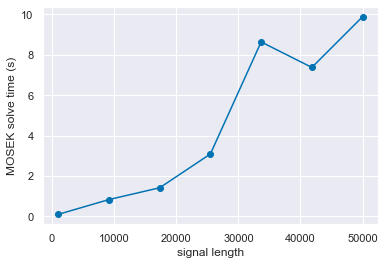

In [270]:
plt.plot(lengths, times, '-o')
# plt.xscale('log')
plt.xlabel('signal length')
plt.ylabel('MOSEK solve time (s)')
# plt.yscale('log')

Text(0, 0.5, 'OSQP solve time (s)')

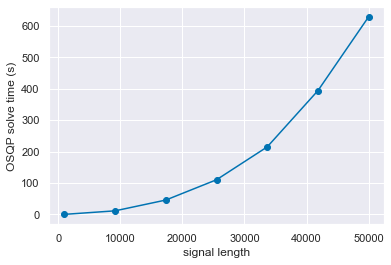

In [9]:
plt.plot(lengths, times, '-o')
# plt.xscale('log')
plt.xlabel('signal length')
plt.ylabel('OSQP solve time (s)')
# plt.yscale('log')

In [24]:
X = np.c_[np.ones(7), lengths, np.power(lengths, 2)]
X.shape

(7, 3)

In [19]:
fit = np.linalg.pinv(X) @ np.array(times)

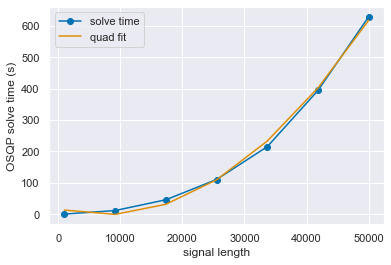

In [25]:
plt.plot(lengths, times, '-o', label='solve time')
plt.plot(lengths, X @ fit, label='quad fit')
# plt.xscale('log')
plt.xlabel('signal length')
plt.ylabel('OSQP solve time (s)')
plt.legend();
# plt.yscale('log')

In [281]:
T = 10000
y_all = np.random.randn(T) + np.linspace(0,4,T)


In [282]:

y = y_all
x = cvx.Variable(len(y))
problem = cvx.Problem(
    cvx.Minimize(
        cvx.sum_squares(x - y)
    ),
    [cvx.diff(x, k=1) >= 0]
)

In [283]:
problem.solve(verbose=True, solver='ECOS')


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.049e-04  +1e+04  4e-01  4e-04  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  -3.876e+00  -3.455e+00  +5e+03  4e-02  2e-04  9e-01  5e-01  0.9226  3e-01   1  3  2 |  0  0
 2  +3.352e+01  +3.366e+01  +3e+02  2e-02  2e-05  2e-01  3e-02  0.9736  4e-02   3  4  4 |  0  0
 3  +4.271e+02  +4.290e+02  +1e+02  9e-01  1e-04  2e+00  1e-02  0.9152  3e-01   4  5  5 |  0  0
 4  +4.920e+02  +4.922e+02  +6e+00  7e-02  5e-06  2e-01  6e-04  0.9570  1e-04   4  3  3 |  0  0
 5  +7.495e+02  +7.497e+02  +1e+00  5e-02  2e-06  2e-01  1e-04  0.9575  2e-01   5  4  5 |  0  0
 6  +6.842e+02  +6.851e+02  +7e-01  3e-01  4e-06  9e-01  7e-05  0.8975  4e-01   9  9  9 |  0  0
 7  +9.401e+02  +9.401e+02  +2e-01  5e-02  8e-07  7e-02  2e-05  0.8386  9e-02   6  5  5 |  0  0
 8  +1.173e+03  +1.173e+03  +8e-02  6e-02  7e-

/Users/bennetmeyers/miniconda3/envs/osd/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


9636.239659799228

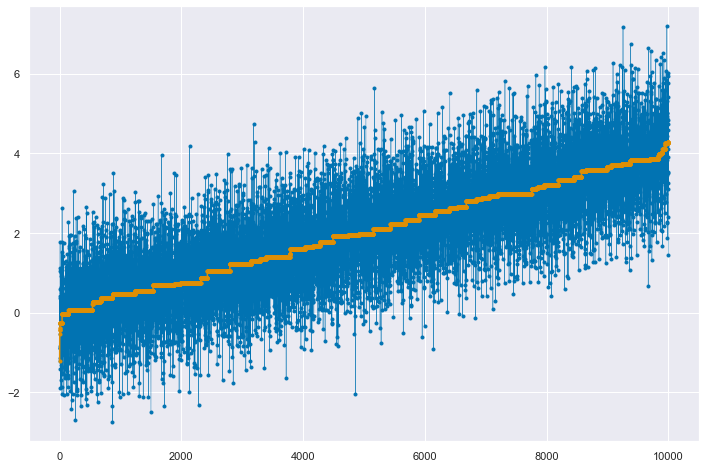

In [284]:
plt.figure(figsize=(12,8))
plt.plot(y, linewidth=0.4, marker='.')
plt.plot(x.value, marker='.')
# plt.axhline(np.average(y[-5:]))
# plt.axhline(np.average(y[1:5]))
# plt.axhline(np.average(y[1:]))

In [220]:
# problem.solve(verbose=True, solver='MOSEK')
problem.solve(verbose=True, max_iter=int(5e5))

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 8, constraints m = 7
          nnz(P) + nnz(A) = 18
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 500000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   6.03e-01   6.03e+01   1.00e-01   6.27e-05s
  50   3.8416e-01   5.73e-10   8.12e-10   1.44e+00   1.23e-04s
plsh   3.8416e-01   1.39e-17   1.57e-16   -------

0.38415691646077516

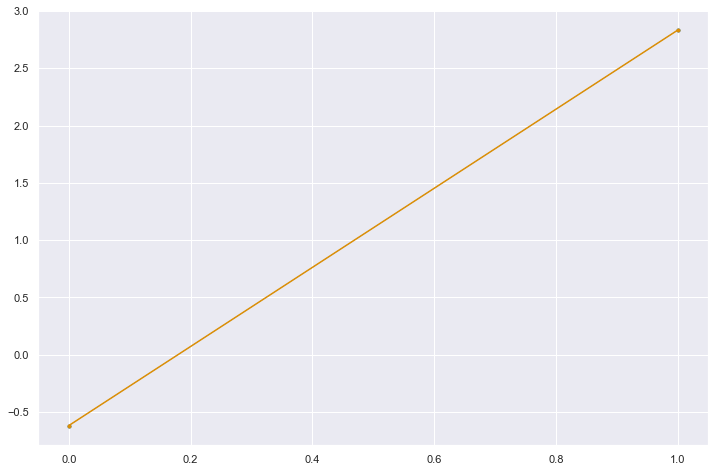

In [191]:
plt.figure(figsize=(12,8))
plt.plot(y, linewidth=0.4, marker='.')
plt.plot(x.value, marker='.')
# plt.axhline(np.average(y[1:]))

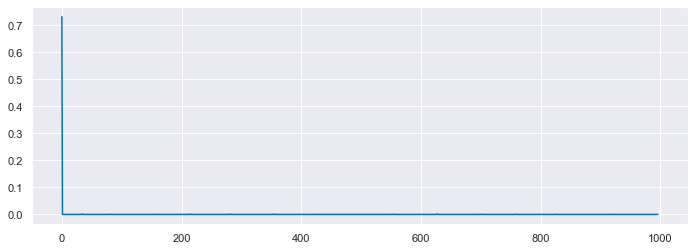

In [153]:
plt.figure(figsize=(11.75,4))
plt.plot(np.clip(cvx.diff(x, k=3).value, 0, np.inf))